Veri bilimine ilgi duyuyorsunuz ancak nereden başlayacağınız konusunda kafanız karışık mı? [Python](http://www.veridefteri.com/2017/10/30/veri-bilimciler-icin-python-ekosistemi/) ekosistemi hakkında bilginiz var. [Jupyter Notebook](http://www.veridefteri.com/2017/10/30/jupyter-notebook-nedir-2/) ile aranız fena değil. Sırada elinizi kirletmek var. Bunu yapmanın en kolay yollarından biri `scikit-learn` kütüphanesini kullanmak.

`scikit-learn` yapay öğrenme alanında en yaygın olarak kullanılan kütüphanelerden biri. Doğrusal regresyon, lojistik regresyon, karar ağaçları, rastgele orman gibi birçok temel yöntemi içeren bu kütüphane, Anaconda ile beraber geliyor. Anaconda kullanmayanlar [web](http://scikit-learn.org/) sitesinden kütüphaneyi nasıl yükleyeceklerini öğrenebilirler. 

`scikit-learn` paketinin bu kadar popüler olmasının birkaç sebebi var. Bunlardan ilki ihtiyaç duyacağınız temel yöntemlerin büyük bir kısmını içermesi. İkinci olarak, `scikit-learn` sayesinde veri analitiği uygulamalarını baştan sona yürütmenizin mümkün olmasını sayabiliriz. Verideki eksik değerleri doldurmak, öznitelik seçmek, çapraz doğrulama yapmak, sonuçları değerlendirmek için ayrı ayrı modüller sayesinde başka bir pakete ihtiyacınız kalmıyor. `scikit-learn` paketinin en güzel yanı basit bir API'a sahip olması sayesinde uygulayacağınız farklı yöntemler için farklı sözdizimleri öğrenmenizin önüne geçmesi. Bu sayede veri analitiğine yeni başlayanlar hızla ellerini kirletebiliyorlar. `fit/predict` ya da `fit/transform` fonksiyonları sayesinde kümeleme, regresyon, karar ağaçları gibi yöntemleri uygulamak, eksik değerleri doldurmak, veriyi ölçeklendirmek gibi farklı adımlarda benzer fonksiyonlar kullanmak işinizi oldukça kolaylaştırıyor. API basit olmasının yanında çok iyi bir dokümantasyona sahip. 

`lightgbm`, `tensorflow` gibi kütüphaneler performans açısından ileride olsa da `scikit-learn` başlangıç seviyesindekiler için benim tavsiye edeceğim ilk kütüphane. Veri Defteri'nde `scikit-learn` paketinin API'ını bir örnek üzerinden anlatıp, temel modüllerden bahsedeceğiz. Bu amaçla yine `scikit-learn` altındaki veri kümelerini kullanacağız.

Örneğimiz `digits` veri kümesi üzerinden bir sınıflandırma problemi olacak. `digits` veri kümesi elle yazılmış rakamların 8\*8 büyüklüğündeki resimlerinin piksel (8\*8 = 64) değerlerinden oluşuyor. Amacımız veri kümesindeki 3 ve 8 rakamlarını birbirinden ayırmak. Kaan `digits` veri kümesinden bir [yazısında](http://www.veridefteri.com/2017/11/03/yeni-baslayanlar-icin-veri-kumeleri-cicekler-bebekler-filmler/) bahsetmişti. Kullanacağımız modülleri, veri kümesini yükleyelim ve öğrenme ve sınama için ikiye bölelim.

In [1]:
#Rakamlar veri kümesini yüklüyoruz.
from sklearn.datasets import load_digits
#numpy paketini yüklüyoruz.
import numpy as np
#Veri kümesini ikiye bölmek için kullanıyoruz.
from sklearn.model_selection import train_test_split
#Resimleri incelemek için matplotlib kullanıyoruz.
%matplotlib inline
import matplotlib.pyplot as plt

#Veri kümesini etiket değerleriyle birlikte yükleyelim.
X,y = load_digits(return_X_y=True)
print('Verinin boyutları (Gözlem, öznitelik) = ' + str(np.shape(X)))
print('Etiketlerin boyutları (Gözlem) = ' + str(np.shape(y)))

Verinin boyutları (Gözlem, öznitelik) = (1797, 64)
Etiketlerin boyutları (Gözlem) = (1797,)


Veri kümesi 64 öznitelik (bunlar piksellerin değerlerine denk geliyor) ve 1797 gözlemden oluşuyor. Veri kümesinin ilk rakamını inceleyerek başlayalım. Rakamı çizdirmek için (1,64) olan boyutu (8,8) şeklinde değiştirmemiz gerekiyor. Bu amaçla da `numpy` altında `reshape` fonksiyonunu kullanacağız.

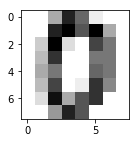

Etiket: 0


In [2]:
rakam1 = X[0]
rakam1 = np.reshape(rakam1, (8,8))

plt.figure(figsize= (2,2))
plt.imshow(rakam1, cmap="gray_r")
plt.show()
etiket1 = y[0]
print('Etiket: ' + str(etiket1))

Gördüğümüz gibi ilk rakam 0. Veri kümesindeki 3 ve 8 rakamlarını ayırmak istiyoruz. Bu amaçla filtreleme kullanacağız. Eğer bir rakam beşe bölündüğünde kalan üç ise istediğimiz koşulları sağlıyor.

In [3]:
#3 ve 8 rakamlarını seçmek için filtreleme kullanacağız.
#Filtrelemeyi etiket değerlerine (y) bakarak yapacağız. 
#Etiket değeri beşe bölündüğünde kalan üç ise bu gözlemleri veri kümesinde bırakıyoruz.
X= X[y%5 == 3]
y= y[y%5 == 3]

#Son olarak etiketleri 0 ve 1 değerlerine çevirelim.
#Rakam 3 ise etiket 0, 8 ise 1 olacak.
y = (y==8)*1
print('Verinin boyutları (Gözlem, öznitelik) = ' + str(np.shape(X)))
print('Etiketlerin boyutları (Gözlem) = ' + str(np.shape(y)))

Verinin boyutları (Gözlem, öznitelik) = (357, 64)
Etiketlerin boyutları (Gözlem) = (357,)


Öğrenen modellerin başarısını sınamak için veri kümesini öğrenme (train) ve sınama (test) olarak ikiye bölelim. Bu da `scikit-learn` altında yapılabilecek bir işlem. Burada dikkat etmemiz gereken, veri kümesini bölerken etiketlerin yüzdelerini korumak. Bu sayede veri kümesinin sadece bir rakamdan oluşması gibi durumların önüne geçmeyi hedefliyoruz. `stratify` argümanı ile veri kümesini bölerken etiket değerlerini de hesaba katıyoruz. 

In [4]:
#Stratify değeri veri kümesinin etiket yüzdelerini korumak için kullanılıyor.
#Öğrenme veri kümesini küçük tutarak sonuçların çok iyi olmasını engelliyoruz.
#random_state değeri sonuçların her seferinde aynı çıkmasını sağlamak için kullanılıyor.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, test_size = 0.5, random_state = 0, stratify = y)

print('Öğrenme verisinin boyutları (Gözlem, öznitelik) = ' + str(np.shape(X_train)))
print('Sınama verisinin boyutları (Gözlem, öznitelik) = ' + str(np.shape(X_test)))

Öğrenme verisinin boyutları (Gözlem, öznitelik) = (178, 64)
Sınama verisinin boyutları (Gözlem, öznitelik) = (179, 64)


Veri kümesini ikiye böldük. Şimdi sınıflandırma için karar ağacı ve rastgele orman yöntemlerini kullanıp karşılaştıracağız. `scikit-learn` API'ının üç adımlık basit bir kullanımı var. Şimdi bu adımları inceleyelim. 

## Kullanacağımız sınıfa ait bir örnek oluşturma
Örnek olarak bir karar ağacı oluşturmak ya da eksik değerleri ortalama değerle doldurmak istiyorsunuz. Bu amaçla gerekli sınıflara (class) ait örnekleri istediğiniz parametrelerle oluşturmanız gerekiyor..

`dt` adında bir karar ağacı oluşturmak için `DecisionTreeClassifier` sınıfını kullanıyoruz: 

`dt = DecisionTreeClassifier()`

Eksik değerleri ortalama değerle değiştirmek için ise `Imputer` sınıfını kullanacağız. `NaN` şeklinde olan eksik değerleri ortalama (mean) değerle değiştirmek istersek bunu kullanacağımız argümanlarla belirtmemiz gerekiyor.

`mean_imputer = Imputer(missing_values = 'NaN', strategy = 'mean')` 

Aşağıda `dt` adında bir karar ağacı ve `rf` adında bir rastgele orman örneği tanımlıyoruz.

In [5]:
#Karar ağaçları
from sklearn.tree import DecisionTreeClassifier
#Rastgele orman
from sklearn.ensemble import RandomForestClassifier

#Karar ağacı modelini oluşturalım. 
#random_state değeri sayesinde sonuçların rassal olarak değişmemesini sağlıyoruz.
dt = DecisionTreeClassifier(random_state = 0)

#Rastgele orman modelini oluşturalım.
rf = RandomForestClassifier(random_state = 0)

## Oluşturduğumuz örneğin öğrenmesini sağlama (fit)
Bir önceki aşamada oluşturduğumuz örneğin veri üzerinde öğrenmesi `fit` fonksiyonuyla yapılıyor. Örneğin bir karar ağacını öznitelik ve etiketleri kullanarak eğitmek için `fit` fonksiyonunu aşağıdaki gibi kullanabiliriz:

`dt.fit(X_train, y_train)`

Bu sayede öğrenme verisi üzerinden bir karar ağacı modeli oluşturulur. 

Eksik değerleri doldurmak için de `fit` fonksiyonunu kullanacağız. Ancak burada `fit` fonksiyonu sadece yapacağımız işlemi tanımlıyor. Aşağıdaki satırda `X_train` matrisindeki eksik değer içeren sütunlar için ortalama değer hesaplanıyor.

`mean_imputer.fit(X_train)` 

Şimdi yukarıda oluşturduğumuz karar ağacı ve rastgele orman modellerini eğitelim.

In [6]:
#Modellerin öğrenmesini sağlayalım.
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Sonuçları elde etmek (predict/predict_proba ve transform)
Oluşturduğunuz modelleri eğittikten sonra sonuçları elde etmek için kullanabileceğiniz iki farklı fonksiyon tipi var.

* `predict`: Regresyon, sınıflandırma, kümeleme gibi yöntemler kullanarak yapacağınız çalışmalarda tahmin edilen etiket bilgisini `predict` fonksiyonuyla elde edebilirsiniz. Sınıflandırma problemlerinde gözlemlerin sınıflara ait olma olasılıklarını elde etmek istiyorsanız `predict_proba` fonksiyonunu kullanmanız gerekiyor.

Yukarıda oluşturduğumuz karar ağacı için etiketleri elde etmek için aşağıdaki satıra ihtiyacımız var:

`y_pred = dt.predict(X_test)`

Eğer etiketleri değil de olasılıkları öğrenmek istiyorsak `predict_proba` fonksiyonunu kullanmamız gerekiyor. Sonuçlar her etikete ait olma yüzdesini içeriyor.

`y_pred_proba = dt.predict_proba(X_test)`

* `transform`: Veriyle ilgili yapacağımız dönüştürme işlemlerinde ise `transform` fonksiyonunu kullanacağız. Dönüştürme işlemleri eksik veriyi doldurma, veriyi ölçeklendirme gibi alanlarda karşımıza çıkıyor. Aynı zamanda bir matrisi çarpanlarına ayırmak gibi işlemler için de `transform` fonksiyonu kullanılıyor.

Eksik değerleri doldurmak için aşağıdaki satırı kullanabiliriz:

`X_test = mean_imputer.transform(X_test)`

Şimdi kullandığımız iki modeli sınama veri kümesinde kullanarak etiketleri ve gözlemlerin etiketlere ait olma olasılıklarını hesaplayalım. 

In [7]:
#Sınama verisinin etiketlerini elde edelim.
y_pred_dt = dt.predict(X_test)
#Sınama veri kümesinin sınıflara ait olma olasılıklarını alalım.
y_pred_proba_dt = dt.predict_proba(X_test)

#Aynı adımları rastgele orman yöntemi için tekrarlayalım.
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)

Burada dikkat etmemiz gereken bir nokta `fit` işlemlerini öğrenme, `predict` ve `transform` işlemlerini ise sınama verisi üzerinden yapmak. Yapacağımız çalışmalardaki amacımız öğrenme veri kümesiyle yakaladığımız örüntüleri sınama verisi üzerinde denemek. Yani, sınama veri kümesinin sadece son aşamada kullanılması gerekiyor. Eksik değerleri doldurmak gibi konularda da öğrenme verisiyle elde ettiğimiz bilgileri (örnek olarak ortalamayı) sınama verisinde kullanıyoruz. Sınama veri kümesi için de `fit` fonksiyonunu kullanmak sıklıkla yapılan bir hata.

Aşağıdaki satırlarda öğrenme verisindeki sütunlar için ortalama değeri bulup eksik değerleri dolduruyoruz. Daha sonra da sınama verisindeki sütunlar için ortalama değerleri bulup eksik değerleri doldurmak için kullanıyoruz. Oysa ki yapmamız gereken sınama verisinde de öğrenme verisindeki ortalamaları kullanmak.

`mean_imputer.fit(X_train)
X_train = mean_imputer.transform(X_train)
mean_imputer.fit(X_test)
X_test = mean_imputer.transform(X_test)`

# Sonuçları değerlendirmek ve yorumlamak

`scikit-learn` modellerin sonuçlarını değerlendirmek ve yorumlamak için de çeşitli araçlar sunuyor. Sonuçları değerlendirmek için isabetlilik (accuracy) ve eğri altı alan (area under curve) değerlerini kullanacağız. `metrics` modülünün altında farklı yöntemleri (sınıflandırma, regresyon, kümeleme) değerlendirmek için araçlar da var.

In [8]:
#Sonuçları değerlendirmek için aşağıdaki fonksiyonları kullanacağız.
from sklearn.metrics import roc_auc_score, accuracy_score
#İsabetlilik değeri için etiketlere ihtiyacımız var.
print('Karar ağacı isabetlilik değeri: ' + str(accuracy_score(y_pred_dt, y_test)))
print('Rastgele orman isabetlilik değeri: ' + str(accuracy_score(y_pred_rf, y_test)))

#Eğri altı alan değeri için etiketlerin olasılıklarına ihtiyacımız var.
#Bu amaçla etiketlerin 1 değerinde olma yüzdelerini kullanacağız.
print('Karar ağacı eğri altı alan değeri: ' + str(roc_auc_score(y_test, y_pred_proba_dt[:,1])))
print('Rastgele orman eğri altı alan değeri: ' + str(roc_auc_score(y_test, y_pred_proba_rf[:,1])))

Karar ağacı isabetlilik değeri: 0.927374301676
Rastgele orman isabetlilik değeri: 0.960893854749
Karar ağacı eğri altı alan değeri: 0.928723138431
Rastgele orman eğri altı alan değeri: 0.997876061969


İsabetlilik değeri ve eğri altı değeri de rastgele orman yönteminde daha yüksek çıktı.

3 ve 8 rakamlarını ayırmamızı sağlayan öznitelikler (piksel değerleri) hangileri? Şimdi de `features_importances_` özelliğini kullanarak modellerin önemli bulduğu piksellere bakalım. 

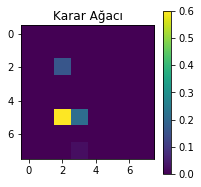

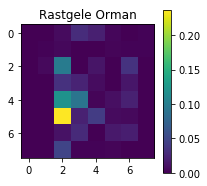

In [9]:
features_dt = dt.feature_importances_
features_rf = rf.feature_importances_

features_dt = np.reshape(features_dt, (8,8))
features_rf = np.reshape(features_rf, (8,8))


plt.figure(figsize=(3,3))
plt.imshow(features_dt)
plt.title('Karar Ağacı')
plt.colorbar()
plt.show()


plt.figure(figsize=(3,3))
plt.imshow(features_rf)
plt.title('Rastgele Orman')
plt.colorbar()
plt.show()


Önemli olan öznitelikler sarı ve açık mavi, önemsiz olanlarsa koyu mavi ile gösteriliyor. Karar ağaçları daha çok 3 piksele bakarken, rastgele orman yöntemi daha fazla piksele bakarak karar veriyor. İki yöntem de ağırlıklı olarak resmin sol tarafına bakıyor, yani resimlerin sol tarafı 3 ve 8 rakamlarını ayırmak önemli olan pikselleri içeriyor.

# Diğer Modüller
Bu yazıda sınıflandırma algoritmalarına bakmış olsak da `scikit-learn` altında başka modüller de var. Bunlardan sıklıkla kullanılanları aşağıda bulabilirsiniz:

* `cluster`: Başta k-ortalamalar algoritması olmak üzere kümeleme yöntemlerini içeriyor.
* `ensemble`: Adaboost, gradient boosting ve rastgele orman gibi grup halinde (ensemble) tahmin yapan yöntemleri bu modül altında yer alıyor.
* `feature_selection`: Öznitelik seçme/azaltma algoritmalarını içeriyor.
* `linear_model`: Başta doğrusal regresyon ve lojistik regresyon olmak üzere doğrusal yöntemleri içeriyor. Bu modül altında genelde regresyon yöntemleri bulunuyor.
* `metrics`: Regresyon, sınıflandırma ve kümeleme problemlerinde elde ettiğiniz sonuçları değerlendirmek için kullanabileceğiniz araçları kapsıyor.
* `model_selection`: Çapraz doğrulama (cross-validation) ve veri kümesini bölmek için kullanabileceğiniz bir modül.
* `neighbors`: Gözlemlerin birbirine yakınlığı üzerinden sınıflandırma ve regresyon uygulayan yöntemlerden (k en yakın komşu yöntemi gibi) oluşuyor.
* `neural_network`: Yapay sinir ağları üzerinden denemeler yapabileceğiniz bir modül. Ciddi bir çalışma gerçekleştirmek için başka paketlere ihtiyaç duyabilirsiniz.
* `preprocessing`: Veri üzerinde ölçeklendirme, eksik değerleri doldurma ve kategorik değişkenleri ikili değerlere çevirmek gibi işlemleri `preprocessing` ile yapabilirsiniz.
* `svm`: Destek vektör makineleri modülü. Sınıflandırma, regresyon ve aykırı gözlem bulmak için kullanılabilen algoritmalardan oluşuyor.
* `tree`: Karar ağaçları temelli yöntemleri içeriyor.




Bu Veri Defteri'ni [github](https://github.com/sibirbil/VeriDefteri) dizinimizde bulabilirsiniz. 